In [86]:
import pandas as pd
import re

from sklearn.decomposition import PCA, TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
# from sklearn.semi_supervised import LabelSpreading
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
from pymystem3 import Mystem
nltk.download('wordnet')
# from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
!ls

Untitled.ipynb           pulse_stage1.csv
original_dataset_mk1.csv toxic_prep.ipynb


In [ ]:
!pip install deeppavlov

In [ ]:
!python3 -m deeppavlov install levenshtein_corrector_ru

In [47]:
from deeppavlov import build_model, configs

CONFIG_PATH = configs.spelling_correction.levenshtein_corrector_ru

spellcheck_model = build_model(CONFIG_PATH, download=True)

2021-04-14 15:33:22.527 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/vocabs/russian_words_vocab.dict.gz download because of matching hashes
2021-04-14 15:33:36.481 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/lang_models/ru_wiyalen_no_punkt.arpa.binary.gz download because of matching hashes
[nltk_data] Downloading package punkt to /Users/crafterrr/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package perluniprops to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /Users/crafterrr/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.
2021-04-14 15:33:55.747 INFO in 'deeppavlov.co

In [11]:
!pip install fastDamerauLevenshtein

  Stored in directory: /Users/crafterrr/Library/Caches/pip/wheels/4b/fd/b6/a9d6af68760233825060daf7f212dcaa8bf0b7429daab28477
Successfully built fastDamerauLevenshtein
You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [104]:
from fastDamerauLevenshtein import damerauLevenshtein

In [105]:
pulse = pd.read_csv("original_dataset_mk1.csv")

In [106]:
pulse

,Unnamed: 0,text,y
0,0,Пиздабол ещё тот,1
1,1,"Заколебали кукарекать, скоро весь пульс будет ...",1
2,2,На деле собака сутулая,1
3,3,Пшнх от сюда тварь,1
4,4,"плати за мое молчание клоп , сутки молчу 200 б...",1
...,...,...,...
34602,34602,"Тут не то, что ТА не работает, здравый смысл о...",0
34603,34603,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...,0
34604,34604,"Ахаха, тока щас заметил что за это гавно комис...",0
34605,34605,"Я с Теслой месяц мучился с плечом , в итоге вс...",0


In [107]:
pulse = pd.read_csv("original_dataset_mk1.csv")
pulse['label'] = pulse['y'].astype(int)
pulse['message'] = pulse['text']
pulse

,Unnamed: 0,text,y,label,message
0,0,Пиздабол ещё тот,1,1,Пиздабол ещё тот
1,1,"Заколебали кукарекать, скоро весь пульс будет ...",1,1,"Заколебали кукарекать, скоро весь пульс будет ..."
2,2,На деле собака сутулая,1,1,На деле собака сутулая
3,3,Пшнх от сюда тварь,1,1,Пшнх от сюда тварь
4,4,"плати за мое молчание клоп , сутки молчу 200 б...",1,1,"плати за мое молчание клоп , сутки молчу 200 б..."
...,...,...,...,...,...
34602,34602,"Тут не то, что ТА не работает, здравый смысл о...",0,0,"Тут не то, что ТА не работает, здравый смысл о..."
34603,34603,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...,0,0,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...
34604,34604,"Ахаха, тока щас заметил что за это гавно комис...",0,0,"Ахаха, тока щас заметил что за это гавно комис..."
34605,34605,"Я с Теслой месяц мучился с плечом , в итоге вс...",0,0,"Я с Теслой месяц мучился с плечом , в итоге вс..."


In [108]:
def prepare_preproc_and_features(pulse, pulse_data=False):

    mystem = Mystem()
    
    def remove_mentions(s: str):
        return ' '.join(i if not i.startswith('@') else 'юзернейм' for i in s.split(' '))


    def remove_stocks(s: str):
        if not pulse_data:
            return s
        return ' '.join(i if not i.startswith('{$') else 'стокнейм' for i in s.split(' '))


    def get_caps_feature(text):
        upper = re.sub('[^А-Я]+', '', text)
        return len(upper)


    def get_actions(text):
        return text.count('стокнейм')


    def get_mentions(text):
        return text.count('юзернейм')


    def text_preprocessing(text):
        if type(text) == str:
            text = re.sub(re.compile('<.*?>'), '', text)
            text = re.sub('[^A-Za-zА-Яа-я]+', ' ', text)
            text = text.lower()
        else: 
            text = ''
        return text

    
    def spellcheck_message(s):
        return spellcheck_model([s])[0]
    
    def compare_messages(before, after):
        return damerauLevenshtein(before, after, similarity=True)

    def lemmatizer(x):
        return " ".join(mystem.lemmatize(x))


    pronomens = {
        'pr1': ['я', 'мой', 'меня'],
        'pr2': ['ты', 'твой', 'тебя'],
        'pr3': ['себя'],
        'pr4': ['мы', 'наш', 'нас'],
        'pr5': ['вы', 'ваш', 'вас'],
        'pr6': ['он', 'она', 'они', 'оно', 'её', 'его', 'их']
    }

    def compute_pronomens(text):
        result = []
        words = text.split()
        for key in pronomens.keys():
            pr_count = 0
            for word in pronomens[key]:
                pr_count += text.count(word)
            result.append(pr_count)
        return result


    def count_words(text):
        return len(text.split())

    # Замена имён и акций, добавить замену ссылок и смайлов на их названия, подсчёт количества символов
    pulse['n_words'] = pulse['message'].apply(count_words)
    pulse['message'] = pulse['message'].apply(remove_mentions).apply(remove_stocks)

    pulse['caps_lock'] = pulse['message'].apply(get_caps_feature)
    pulse['mentions'] = pulse['message'].apply(get_mentions)
    pulse['actions'] = pulse['message'].apply(get_actions)
    # Добавить ссылки и смайлики

    # Удаление лишних символов и вычисление длины строки
    pulse['message'] = pulse['message'].apply(text_preprocessing)
    pulse['length'] = pulse['message'].str.len()

    
    pulse['message_no_spellcheck'] = pulse['message']
    # Здесь добавить исправление грамотности и сравнение грамотных сообщений с предыдущими
    if pulse_data:
        pulse['message'] = pulse['message'].apply(spellcheck_message)
        
    pulse['message_grammar'] = pulse.apply(lambda x: compare_messages(x['message_no_spellcheck'], x['message']), axis=1)

    # Леммы
    pulse['message'] = pulse['message'].apply(lemmatizer)

    # Удалить пустые
    pulse = pulse[pulse['n_words'] != 0]

    # Подсчёт местоимений
    pr_features = pd.DataFrame(pulse['message'].apply(compute_pronomens).to_list(), columns=pronomens.keys())
    for feature in pr_features.columns:
        pulse[feature] = list(pr_features[feature])
    
    # Деление на количество слов нужных колонок
    columns = ['mentions', 'actions', 'pr1', 'pr2', 'pr3', 'pr4', 'pr5', 'pr6', 'caps_lock']
    for c in columns:
        pulse[c] = pulse[c] / pulse['n_words']
    
    return pulse


processed_df = prepare_preproc_and_features(pulse, pulse_data=True)

In [109]:
processed_df

,Unnamed: 0,text,y,label,message,n_words,caps_lock,mentions,actions,length,message_no_spellcheck,message_grammar,pr1,pr2,pr3,pr4,pr5,pr6
12012,12012,"таков расклад, не каждый волк тебя за жопу ук...",0,0,такой расклад не каждый волк ты за...,13,0.000000,0.0,0.0,69,таков расклад не каждый волк тебя за жопу уку...,0.971014,0.000000,0.076923,0.0,0.0,0.000000,0.000000
29221,29221,"Не наблюдал раньше за этой бумагой, не проясни...",0,0,не наблюдать рано за этот бумага н...,17,0.058824,0.0,0.0,96,не наблюдал раньше за этой бумагой не прояснит...,0.989583,0.117647,0.000000,0.0,0.0,0.000000,0.000000
16585,16585,"Было такое, только с другой акцией и не сработ...",0,0,быть такой только с другой акция и...,23,0.086957,0.0,0.0,118,было такое только с другой акцией и не сработа...,0.991525,0.086957,0.043478,0.0,0.0,0.000000,0.000000
49,49,Вы уже поднадоели обсосы тупорогие...,1,1,вы уже поднадоедать обсос тупорогой \n,5,0.200000,0.0,0.0,35,вы уже поднадоели обсосы тупорогие,0.971429,0.000000,0.000000,0.0,0.0,0.200000,0.000000
18418,18418,Мне конечно посадили на бутылку из-за того что...,0,0,я конечно посадить на бутылка из з...,23,0.043478,0.0,0.0,122,мне конечно посадили на бутылку из за того что...,0.975410,0.130435,0.043478,0.0,0.0,0.000000,0.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32024,32024,"Купил ровно неделю назад по 770, при падении н...",0,0,купить ровно неделя назад по при п...,23,0.043478,0.0,0.0,110,купил ровно неделю назад по при падении на буд...,0.981818,0.043478,0.000000,0.0,0.0,0.000000,0.000000
11833,11833,Я делаю другой вывод - от изменений увеличиваю...,0,0,я делать другой вывод от изменение ...,52,0.115385,0.0,0.0,305,я делаю другой вывод от изменений увеличиваютс...,0.993443,0.153846,0.000000,0.0,0.0,0.076923,0.019231
15622,15622,"Интересно, как брокер вернёт позиции , если он...",0,0,интересно как брокер верн т позиция ...,18,0.166667,0.0,0.0,110,интересно как брокер верн т позиции если они у...,1.000000,0.166667,0.000000,0.0,0.0,0.000000,0.111111
30593,30593,"Могу нарисовать такой же, только со стрелкой в...",0,0,мочь нарисовать такой же только со ...,8,0.125000,0.0,0.0,49,могу нарисовать такой же только со стрелкой вниз,0.979592,0.000000,0.000000,0.0,0.0,0.000000,0.000000


1. Построить простую модель
2. Попробовать прероцессинг
3. Поправить орфографию
4. Попробовать лемматизацию

In [47]:
def test_model(model, X, y, k=5):
    skf = StratifiedKFold(n_splits=k, shuffle=True)
    score = []
    roc_auc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        score.append(f1_score(y_test, preds))
        roc_auc.append(roc_auc_score(y_test, preds))
    return score, roc_auc

In [48]:
model = Pipeline([('tfid', TfidfVectorizer(max_features=1000)), ('cl', LogisticRegression(solver='lbfgs', n_jobs=-1))])
test_model(model, df['message'], df['label'])

([0.0967741935483871,
  0.06557377049180328,
  0.09756097560975609,
  0.09448818897637794,
  0.04201680672268908],
 [0.5256902226475343,
  0.5169565981933859,
  0.5258780888609034,
  0.5252944880438621,
  0.5106001617700511])

In [81]:
# def text_preprocessing(text):
#     if type(text) == str:
#         text = re.sub(re.compile('<.*?>'), '', text)
# #         text = text.replace("?", " ?")
# #         text = text.replace("!", " !")
#         text = re.sub('[^A-Za-zА-Яа-я]+', ' ', text)
#         text = text.lower()
#     else: 
#         text = ''
#     return text

In [42]:
df['message'] = df['message'].apply(text_preprocessing)

In [43]:
df

,message,label,split
0,пиздабол ещ тот,True,train
1,заколебали кукарекать скоро весь пульс будет э...,True,train
2,на деле собака сутулая,True,train
3,пшнх от сюда тварь,True,train
4,плати за мое молчание клоп сутки молчу баксов,True,train
...,...,...,...
35407,тут не то что та не работает здравый смысл отс...,False,train
35408,я тоже в бакс по верил когда он уже стоил,False,train
35409,ахаха тока щас заметил что за это гавно комисс...,False,train
35410,я с теслой месяц мучился с плечом в итоге все ...,False,train


In [44]:
model = Pipeline([('tfid', TfidfVectorizer(max_features=1000)), ('cl', LogisticRegression(solver='lbfgs', n_jobs=-1))])
test_model(model, df['message'], df['label'])

([0.0502092050209205,
  0.08943089430894309,
  0.13385826771653542,
  0.11811023622047244,
  0.04065040650406503],
 [0.5128086362727022,
  0.5235797666361274,
  0.5366241508352146,
  0.5320922857186737,
  0.51001656095301])

In [10]:
def lemmatizer(x):
    lemmatizer = WordNetLemmatizer()
    verb = wordnet.VERB
    lems = ''
    words = x.split(' ')
    for word in words:
        lems += lemmatizer.lemmatize(word, verb) + ' '
    return lems

In [11]:
df['message'] = df['message'].apply(lemmatizer)

In [10]:
df

,message,label,split
0,пиздабол ещ тот,True,train
1,заколебали кукарекать скоро весь пульс будет э...,True,train
2,на деле собака сутулая,True,train
3,пшнх от сюда тварь,True,train
4,плати за мое молчание клоп сутки молчу 200 бак...,True,train
...,...,...,...
35407,тут не то что та не работает здравый смысл отс...,False,train
35408,я тоже в бакс по 30 верил когда он уже 50 стои...,False,train
35409,ахаха тока щас заметил что за это гавно комисс...,False,train
35410,я с теслой месяц мучился с плечом в итоге все ...,False,train


In [57]:
df[df['message'].contains('a')]

AttributeError: 'Series' object has no attribute 'contains'

In [13]:
# model = Pipeline([('tfid', TfidfVectorizer(max_features=10000, stop_words=stopwords.words('russian'))),
#                   ('cl', LogisticRegression(solver='lbfgs', n_jobs=-1))])
# test_model(model, df['message'], df['label'])

([0.18241042345276873,
  0.08368200836820082,
  0.10743801652892561,
  0.09205020920502091,
  0.1],
 [0.5574878660725322,
  0.5218340611353712,
  0.5284358218276944,
  0.5241228070175439,
  0.5263157894736842])

In [53]:
model = Pipeline([('tfid', TfidfVectorizer(max_features=10000, stop_words=stopwords.words('russian'))),
                  ('cl', RandomForestClassifier())])
test_model(model, df['message'], df['label'])

([0.4294117647058824,
  0.4107142857142857,
  0.41590214067278286,
  0.40828402366863903,
  0.3769968051118211],
 [0.6566165424072641,
  0.6478829179531156,
  0.6468613538515094,
  0.6483248352863483,
  0.6274892622568969])

In [58]:
model = Pipeline([('tfid', TfidfVectorizer(max_features=10000, analyzer='char', ngram_range=(4,7))),
                  ('cl', RandomForestClassifier())])
test_model(model, df['message'], df['label'])

([0.2698961937716263,
  0.27814569536423844,
  0.22996515679442509,
  0.25170068027210885,
  0.23487544483985764],
 [0.5836208862832146,
  0.5894416036025245,
  0.5704717183972479,
  0.5790247979154188,
  0.5709094190100288])

In [78]:

pulse

,message,label,split,mean_length
0,Пиздабол ещё тот,1,train,16
1,"Заколебали кукарекать, скоро весь пульс будет ...",1,train,68
2,На деле собака сутулая,1,train,22
3,Пшнх от сюда тварь,1,train,18
4,"плати за мое молчание клоп , сутки молчу 200 б...",1,train,51
...,...,...,...,...
34602,"Тут не то, что ТА не работает, здравый смысл о...",0,train,56
34603,Я тоже в бакс по 30 верил\nКогда он уже 50 сто...,0,train,50
34604,"Ахаха, тока щас заметил что за это гавно комис...",0,train,114
34605,"Я с Теслой месяц мучился с плечом , в итоге вс...",0,train,108


(array([660., 288., 103.,  36.,  18.,  10.,   6.,   8.,   7.,   5.]),
 array([  3. ,  47.7,  92.4, 137.1, 181.8, 226.5, 271.2, 315.9, 360.6,
        405.3, 450. ]),
 <BarContainer object of 10 artists>)

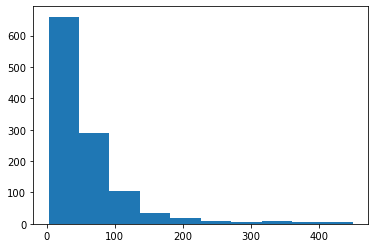

In [79]:
from matplotlib import pyplot as plt

plt.hist(pulse[pulse['label'] == 1]['mean_length'])

(array([ 8353., 10307.,  6139.,  3432.,  2129.,  1214.,   767.,   495.,
          366.,   264.]),
 array([  3. ,  52.7, 102.4, 152.1, 201.8, 251.5, 301.2, 350.9, 400.6,
        450.3, 500. ]),
 <BarContainer object of 10 artists>)

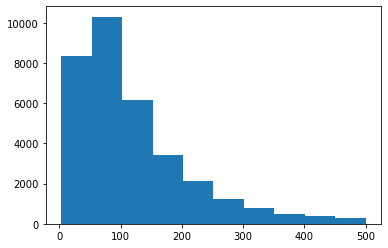

In [80]:
plt.hist(pulse[pulse['label'] == 0]['mean_length'])